In [1]:
from warnings import filterwarnings

filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
from more_itertools import flatten
import missingno as msno

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [5]:
gov_df = pd.read_csv('data/ddrevisited_data_v1.csv', encoding = 'latin-1')

gov_df.rename({'chgterr': 'territory_change', 'ychgterr': 'territory_change_year',
        'entryy': 'first_recorded_year', 'exity': 'last_recorded_year',
        'bornyear': 'born_year', 'endyear': 'died_year',
        'exselec': 'election_type', 'legselec': 'legislation_type',
        'closed': 'legislature_status', 'dejure': 'party_legal_status',
        'defacto': 'party_existance', 'defacto2': 'party_existance_outside_regime', 
        'lparty': 'legislature_parties', 'incumb': 'incumbent_type',
        'collect': 'collective_leadership', 'eheads': 'num_leadership_changes',
        'ehead': 'leader_name', 'epost': 'post_name', 'edate': 'entrance_date',
        'ageeh': 'leader_tenure', 'emil': 'military_leader',
        'royal': 'royal_leader', 'comm': 'communist_leader',
        'edeath': 'leader_died', 'democracy': 'democratic_regime',
        'assconfid': 'cabinet_assembly', 'poppreselec': 'popular_election',
        'regime': 'regime_type', 'ttd': 'transition_to_democracy',
        'tta': 'transition_to_dictatorship', 'agedem': 'age_govt',
        'stra': 'num_transitions_ever', 'cowcode': 'c_code_1',
        'ctryname': 'state_name_1', 'headdiff': 'nominal_vs_eff_diff',
        'cowcode2': 'c_code_2'},
       axis = 1, inplace = True)

gov_df.drop(['order', 'aclpcode', 'c_code_2', 'qogctycode', 'qogctylett',
             'qogctyyear', 'ccdcodelet', 'ccdcodenum', 'aclpyear',
             'cowcode2year', 'cowcodeyear', 'flagc_cowcode2', 'flage_cowcode2',
             'imf_code', 'politycode', 'bankscode', 'dpicode', 'uncode', 'un_region',
             'un_continent', 'last_recorded_year', 'dupcow', 'dupwdi',
             'dupun', 'dupdpi', 'dupimf', 'dupbanks', 'cid', 'wdicode',
             'aclp_region', 'type2', 'nheads', 'nmil', 'nhead', 'npost',
             'ndate', 'entrance_date', 'tenure08', 'ecens08', 'flageh',
             'tt', 'flagc', 'flagdem', 'flagreg', 'agereg',
             'first_recorded_year', 'born_year', 'died_year',
             'leader_name', 'post_name'], axis = 1, inplace = True)

gov_df.rename({'un_region_name': 'un_region', 'un_continent_name': 'un_continent'}, axis = 1, inplace = True)

In [6]:
gov_df.loc[gov_df['state_name_1'] == 'Serbia', 'state_name_1'] = 'Yugoslavia'
# gov_df.loc[gov_df['state_name_1'] == 'Viet Nam', 'state_name_1'] = 'Vietnam, North'

In [7]:
len(gov_df[gov_df['c_code_1'].isnull()])

2977

In [8]:
c_code_df = pd.read_pickle('pickle/c_code_df.pkl')

In [9]:
c_code_dic = {}

for i, state in enumerate(c_code_df['state_name']):
    c_code_dic[state] = c_code_df['c_code'][i]

In [10]:
gov_df['c_code_1'] = gov_df['c_code_1'].astype(str)
gov_df['state_name_1'] = gov_df['state_name_1'].astype(str)

for i, code in enumerate(gov_df['c_code_1']):
    if code == 'nan' and gov_df.loc[i, 'state_name_1'] != 'nan':
        gov_df.loc[i, 'c_code_1'] = c_code_dic[gov_df.loc[i, 'state_name_1']]
        
gov_df['c_code_1'] = gov_df['c_code_1'].astype(float)

In [11]:
row_list = []
for c_code in gov_df['c_code_1'].unique():
    years = list(gov_df[gov_df['c_code_1'] == c_code]['year'].unique())
    for year in years:
        row_list.append(list(flatten(gov_df.loc[(gov_df['year'] == year) & (gov_df['c_code_1'] == c_code)].values)))

In [12]:
gov_df = pd.DataFrame(row_list)

gov_df.columns = ['state_name_1', 'year', 'c_code_1', 'territory_change',
                  'territory_change_year', 'un_region', 'un_continent', 'election_type',
                  'legislation_type', 'legislature_status', 'party_legal_status',
                  'party_existance', 'party_existance_outside_regime',
                  'legislature_parties', 'incumbent_type', 'collective_leadership',
                  'num_leadership_changes', 'leader_tenure', 'military_leader',
                  'royal_leader', 'nominal_vs_eff_diff', 'communist_leader',
                  'leader_died', 'democratic_regime', 'cabinet_assembly',
                  'popular_election', 'regime_type', 'transition_to_democracy',
                  'transition_to_dictatorship', 'age_govt', 'num_transitions_ever']

gov_df.drop(['territory_change', 'territory_change_year'], axis = 1, inplace = True)

gov_df['c_code_1'] = gov_df['c_code_1'].astype(int)

In [13]:
len(gov_df[gov_df['c_code_1'].isnull()])

0

In [14]:
gov_df.loc[743, 'election_type'] = 2
gov_df.loc[gov_df['election_type'] == 1, 'election_type'] = 'Direct election'
gov_df.loc[gov_df['election_type'] == 2, 'election_type'] = 'Indirect election'
gov_df.loc[gov_df['election_type'] == 3, 'election_type'] = 'Nonelective'

gov_df.loc[gov_df['legislation_type'] == 0, 'legislation_type'] = 'No legislature exists'
gov_df.loc[gov_df['legislation_type'] == 1, 'legislation_type'] = 'Non‐elective legislature'
gov_df.loc[gov_df['legislation_type'] == 2, 'legislation_type'] = 'Elective legislature'

gov_df.loc[2485, 'legislature_status'] = 2
gov_df.loc[gov_df['legislature_status'] == 0, 'legislature_status'] = 'Closed'
gov_df.loc[gov_df['legislature_status'] == 1, 'legislature_status'] = 'Appointed'
gov_df.loc[gov_df['legislature_status'] == 2, 'legislature_status'] = 'Elected'

gov_df.loc[gov_df['party_legal_status'] == 0, 'party_legal_status'] = 'All parties legally banned'
gov_df.loc[gov_df['party_legal_status'] == 1, 'party_legal_status'] = 'Legally single party state'
gov_df.loc[gov_df['party_legal_status'] == 2, 'party_legal_status'] = 'Multiple parties legally allowed'

gov_df.loc[gov_df['party_existance'] == 0, 'party_existance'] = 'No parties'
gov_df.loc[gov_df['party_existance'] == 1, 'party_existance'] = 'One party'
gov_df.loc[gov_df['party_existance'] == 2, 'party_existance'] = 'Multiple parties'

gov_df.loc[gov_df['party_existance_outside_regime'] == 0, 'party_existance_outside_regime'] = 'No parties'
gov_df.loc[gov_df['party_existance_outside_regime'] == 1, 'party_existance_outside_regime'] = 'One party'
gov_df.loc[gov_df['party_existance_outside_regime'] == 2, 'party_existance_outside_regime'] = 'Multiple parties'

gov_df.loc[gov_df['legislature_parties'] == 0, 'legislature_parties'] = 'No legislature or all nonpartisan'
gov_df.loc[gov_df['legislature_parties'] == 1, 'legislature_parties'] = 'Only members from regime party'
gov_df.loc[gov_df['legislature_parties'] == 2, 'legislature_parties'] = 'Legislature with multiple parties'

gov_df.loc[gov_df['incumbent_type'] == 0, 'incumbent_type'] = 'Democratic incumbent'
gov_df.loc[gov_df['incumbent_type'] == 1, 'incumbent_type'] = 'Rules rewritten unconstitutionally'

gov_df.loc[gov_df['collective_leadership'] == 0, 'collective_leadership'] = 'No'
gov_df.loc[gov_df['collective_leadership'] == 1, 'collective_leadership'] = 'Yes'

gov_df.loc[gov_df['military_leader'] == 0, 'military_leader'] = 'No'
gov_df.loc[gov_df['military_leader'] == 1, 'military_leader'] = 'Yes'
gov_df.loc[gov_df['military_leader'] == 2, 'military_leader'] = 'Yes'

gov_df.loc[gov_df['royal_leader'] == 0, 'royal_leader'] = 'No'
gov_df.loc[gov_df['royal_leader'] == 1, 'royal_leader'] = 'Yes'

gov_df.loc[gov_df['nominal_vs_eff_diff'] == 0, 'nominal_vs_eff_diff'] = 'No'
gov_df.loc[gov_df['nominal_vs_eff_diff'] == 1, 'nominal_vs_eff_diff'] = 'Yes'

gov_df.loc[gov_df['communist_leader'] == 0, 'communist_leader'] = 'No'
gov_df.loc[gov_df['communist_leader'] == 1, 'communist_leader'] = 'Yes'

gov_df.loc[gov_df['leader_died'] == 0, 'leader_died'] = 'Yes'
gov_df.loc[gov_df['leader_died'] == 1, 'leader_died'] = 'No'

gov_df.loc[gov_df['democratic_regime'] == 0, 'democratic_regime'] = 'No'
gov_df.loc[gov_df['democratic_regime'] == 1, 'democratic_regime'] = 'Yes'

gov_df.loc[gov_df['cabinet_assembly'] == 0, 'cabinet_assembly'] = 'No'
gov_df.loc[gov_df['cabinet_assembly'] == 1, 'cabinet_assembly'] = 'Yes'

gov_df.loc[gov_df['popular_election'] == 0, 'popular_election'] = 'No'
gov_df.loc[gov_df['popular_election'] == 1, 'popular_election'] = 'Yes'

gov_df.loc[gov_df['regime_type'] == 0, 'regime_type'] = 'Parliamentary democracy'
gov_df.loc[gov_df['regime_type'] == 1, 'regime_type'] = 'Mixed (semi‐presidential) democracy'
gov_df.loc[gov_df['regime_type'] == 2, 'regime_type'] = 'Presidential democracy'
gov_df.loc[gov_df['regime_type'] == 3, 'regime_type'] = 'Civilian dictatorship'
gov_df.loc[gov_df['regime_type'] == 4, 'regime_type'] = 'Military dictatorship'
gov_df.loc[gov_df['regime_type'] == 5, 'regime_type'] = 'Royal dictatorship'

gov_df.loc[gov_df['transition_to_democracy'] == 0, 'transition_to_democracy'] = 'No'
gov_df.loc[gov_df['transition_to_democracy'] == 1, 'transition_to_democracy'] = 'Yes'

gov_df.loc[gov_df['transition_to_dictatorship'] == 0, 'transition_to_dictatorship'] = 'No'
gov_df.loc[gov_df['transition_to_dictatorship'] == 1, 'transition_to_dictatorship'] = 'Yes'

In [15]:
# gov_df.loc[gov_df['age_govt'] == 0, 'age_govt'] = None
# gov_df.loc[gov_df['legislature_status'].isnull(), 'legislature_status'] = 'Unknown'
# gov_df.loc[gov_df['party_legal_status'].isnull(), 'party_legal_status'] = 'Unknown'
# gov_df.loc[gov_df['party_existance'].isnull(), 'party_existance'] = 'Unknown'
# gov_df.loc[gov_df['party_existance_outside_regime'].isnull(), 'party_existance_outside_regime'] = 'Unknown'
# gov_df.loc[gov_df['legislature_parties'].isnull(), 'legislature_parties'] = 'Unknown'
# gov_df.loc[gov_df['incumbent_type'].isnull(), 'incumbent_type'] = 'Unknown'
# gov_df.loc[gov_df['collective_leadership'].isnull(), 'collective_leadership'] = 'Unknown'
# gov_df.loc[gov_df['military_leader'].isnull(), 'military_leader'] = 'Unknown'
# gov_df.loc[gov_df['royal_leader'].isnull(), 'royal_leader'] = 'Unknown'
# gov_df.loc[gov_df['nominal_vs_eff_diff'].isnull(), 'nominal_vs_eff_diff'] = 'Unknown'
# gov_df.loc[gov_df['communist_leader'].isnull(), 'communist_leader'] = 'Unknown'
# gov_df.loc[gov_df['leader_died'].isnull(), 'leader_died'] = 'Unknown'
# gov_df.loc[gov_df['democratic_regime'].isnull(), 'democratic_regime'] = 'Unknown'
# gov_df.loc[gov_df['cabinet_assembly'].isnull(), 'cabinet_assembly'] = 'Unknown'
# gov_df.loc[gov_df['popular_election'].isnull(), 'popular_election'] = 'Unknown'
# gov_df.loc[gov_df['regime_type'].isnull(), 'regime_type'] = 'Unknown'
# gov_df.loc[gov_df['transition_to_democracy'].isnull(), 'transition_to_democracy'] = 'Unknown'
# gov_df.loc[gov_df['transition_to_dictatorship'].isnull(), 'transition_to_dictatorship'] = 'Unknown'
# gov_df.loc[gov_df['num_leadership_changes'].isnull(), 'num_leadership_changes'] = 'Unknown'
# gov_df.loc[gov_df['leader_tenure'].isnull(), 'leader_tenure'] = 'Unknown'
# gov_df.loc[gov_df['num_transitions_ever'].isnull(), 'num_transitions_ever'] = 'Unknown'

In [16]:
gov_df.loc[gov_df['state_name_1'] == 'Taiwan', 'un_region'] = 'South-Eastern Asia'
gov_df.loc[gov_df['state_name_1'] == 'Tuvalu', 'un_region'] = 'Melanesia'

In [17]:
gov_df.drop(gov_df[(gov_df['legislature_status'].isnull()) & (gov_df['party_legal_status'].isnull()) & (gov_df['party_existance'].isnull()) & (gov_df['party_existance_outside_regime'].isnull()) & (gov_df['legislature_parties'].isnull()) & (gov_df['incumbent_type'].isnull()) & (gov_df['collective_leadership'].isnull()) & (gov_df['num_leadership_changes'].isnull()) & (gov_df['leader_tenure'].isnull()) & (gov_df['military_leader'].isnull()) & (gov_df['royal_leader'].isnull()) & (gov_df['nominal_vs_eff_diff'].isnull()) & (gov_df['communist_leader'].isnull()) & (gov_df['leader_died'].isnull()) & (gov_df['democratic_regime'].isnull()) & (gov_df['cabinet_assembly'].isnull()) & (gov_df['popular_election'].isnull()) & (gov_df['regime_type'].isnull()) & (gov_df['transition_to_democracy'].isnull()) & (gov_df['transition_to_dictatorship'].isnull()) & (gov_df['age_govt'].isnull()) & (gov_df['legislature_status'].isnull()) & (gov_df['legislature_status'].isnull()) & (gov_df['num_transitions_ever'].isnull())].index, inplace = True)

In [18]:
column_list = ['legislature_status', 'party_legal_status',
               'party_existance', 'party_existance_outside_regime',
               'legislature_parties', 'incumbent_type', 'collective_leadership',
               'num_leadership_changes', 'leader_tenure', 'military_leader',
               'royal_leader', 'nominal_vs_eff_diff', 'communist_leader',
               'leader_died', 'democratic_regime', 'cabinet_assembly',
               'popular_election', 'regime_type', 'transition_to_democracy',
               'transition_to_dictatorship', 'num_transitions_ever']

for c_code in gov_df['c_code_1'].unique():
    for column in column_list:
        if len(gov_df[(gov_df['c_code_1'] == c_code) & (gov_df[column].isnull())]) != 0:
            gov_df.loc[(gov_df['c_code_1'] == c_code) & (gov_df[column].isnull()), column] = str(str(gov_df[gov_df['c_code_1'] == c_code][column].value_counts().index).split(',')[0]).split("'")[1]

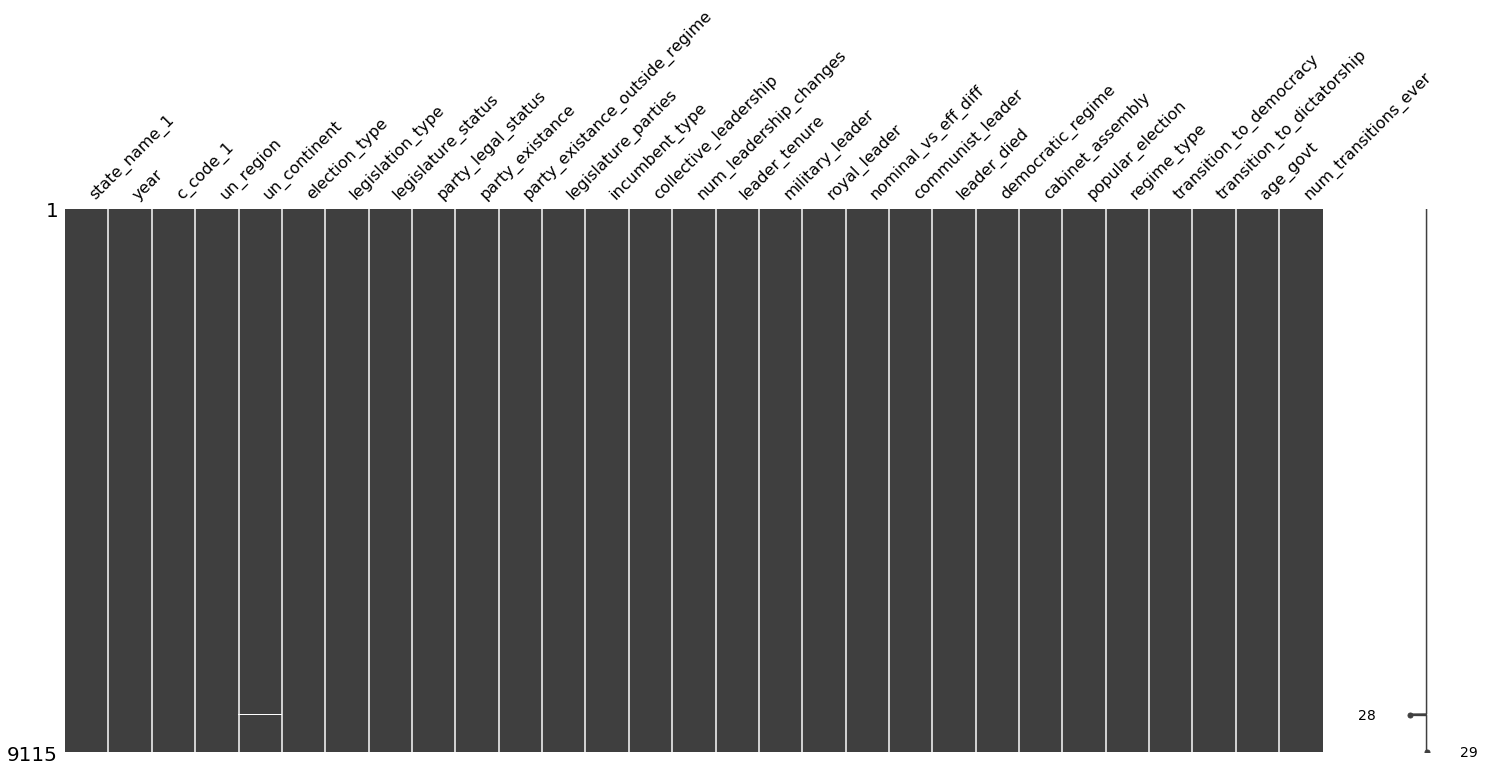

In [19]:
msno.matrix(gov_df);

In [21]:
gov_df.to_pickle('pickle/gov_df.pkl')
gov_df.to_csv('dataframe_exports/gov_df.csv')

In [22]:
gov_df.columns

Index(['state_name_1', 'year', 'c_code_1', 'un_region', 'un_continent',
       'election_type', 'legislation_type', 'legislature_status',
       'party_legal_status', 'party_existance',
       'party_existance_outside_regime', 'legislature_parties',
       'incumbent_type', 'collective_leadership', 'num_leadership_changes',
       'leader_tenure', 'military_leader', 'royal_leader',
       'nominal_vs_eff_diff', 'communist_leader', 'leader_died',
       'democratic_regime', 'cabinet_assembly', 'popular_election',
       'regime_type', 'transition_to_democracy', 'transition_to_dictatorship',
       'age_govt', 'num_transitions_ever'],
      dtype='object')

In [23]:
gov_df['election_type'].value_counts()

Indirect election    3833
Direct election      2803
Nonelective          2479
Name: election_type, dtype: int64

In [24]:
gov_df['legislation_type'].value_counts()

Elective legislature        7682
No legislature exists        988
Non‐elective legislature     445
Name: legislation_type, dtype: int64

In [25]:
gov_df['legislature_status'].value_counts()

Elected      7539
Closed       1197
Appointed     379
Name: legislature_status, dtype: int64

In [26]:
gov_df['party_legal_status'].value_counts()

Multiple parties legally allowed    7080
Legally single party state          1055
All parties legally banned           980
Name: party_legal_status, dtype: int64

In [27]:
gov_df['party_existance'].value_counts()

Multiple parties    6814
One party           1355
No parties           946
Name: party_existance, dtype: int64

In [28]:
gov_df['party_existance_outside_regime'].value_counts()

Multiple parties    6422
One party           1747
No parties           946
Name: party_existance_outside_regime, dtype: int64

In [29]:
gov_df['legislature_parties'].value_counts()

Legislature with multiple parties    5730
No legislature or all nonpartisan    1781
Only members from regime party       1604
Name: legislature_parties, dtype: int64

In [30]:
gov_df['incumbent_type'].value_counts()

Democratic incumbent                  8798
Rules rewritten unconstitutionally     317
Name: incumbent_type, dtype: int64

In [31]:
gov_df['collective_leadership'].value_counts()

No     8992
Yes     123
Name: collective_leadership, dtype: int64

In [32]:
gov_df['num_leadership_changes'].value_counts()

0.00    7451
1.00    1363
2.00     245
3.00      42
4.00      11
6.00       2
5.00       1
Name: num_leadership_changes, dtype: int64

In [33]:
gov_df['leader_tenure'].value_counts().head()

1.00    1692
2.00    1199
3.00     964
4.00     788
5.00     608
Name: leader_tenure, dtype: int64

In [34]:
gov_df['military_leader'].value_counts()

No     7154
Yes    1961
Name: military_leader, dtype: int64

In [35]:
gov_df['royal_leader'].value_counts()

No     8337
Yes     778
Name: royal_leader, dtype: int64

In [36]:
gov_df['nominal_vs_eff_diff'].value_counts()

No     8337
Yes     778
Name: nominal_vs_eff_diff, dtype: int64

In [37]:
gov_df['communist_leader'].value_counts()

No     8421
Yes     694
Name: communist_leader, dtype: int64

In [38]:
gov_df['leader_died'].value_counts()

No     8976
Yes     139
Name: leader_died, dtype: int64

In [39]:
gov_df['democratic_regime'].value_counts()

No     5120
Yes    3995
Name: democratic_regime, dtype: int64

In [40]:
gov_df['cabinet_assembly'].value_counts()

No     6175
Yes    2940
Name: cabinet_assembly, dtype: int64

In [41]:
gov_df['popular_election'].value_counts()

No     7389
Yes    1726
Name: popular_election, dtype: int64

In [42]:
gov_df['regime_type'].value_counts()

Civilian dictatorship                  2649
Parliamentary democracy                2191
Military dictatorship                  1694
Presidential democracy                 1115
Royal dictatorship                      777
Mixed (semi‐presidential) democracy     689
Name: regime_type, dtype: int64

In [43]:
gov_df['transition_to_democracy'].value_counts()

No     9008
Yes     107
Name: transition_to_democracy, dtype: int64

In [44]:
gov_df['transition_to_dictatorship'].value_counts()

No     9048
Yes      67
Name: transition_to_dictatorship, dtype: int64

In [45]:
gov_df['age_govt'].value_counts().head()

1.00    308
2.00    296
3.00    287
4.00    271
5.00    263
Name: age_govt, dtype: int64

In [46]:
gov_df['num_transitions_ever'].value_counts()

0.00    6851
1.00    1620
2.00     487
3.00      95
5.00      33
4.00      29
Name: num_transitions_ever, dtype: int64

In [47]:
gov_df['legislature_status'].value_counts()

Elected      7539
Closed       1197
Appointed     379
Name: legislature_status, dtype: int64